<a href="https://colab.research.google.com/github/renansjs/TCC_Classificador_fakeNews/blob/main/classificador_de_fakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

In [ ]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
data_frame = pd.read_excel("/content/data-base.xlsx")

In [5]:
data_frame.head()

,Unnamed: 0,index,label,preprocessed_news
0,0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,4,fake,radialista americano fala sobre pt vendem ilus...


In [6]:
#data_frame.rename(columns={"preprocessed_news": "Conteudo", "Unnamed: 0": "id"}, inplace=True)

In [7]:
data_frame.head()

,Unnamed: 0,index,label,preprocessed_news
0,0,0,fake,katia abreu diz vai colocar expulsao moldura n...
1,1,1,fake,ray peita bolsonaro conservador fake entrevist...
2,2,2,fake,reinaldo azevedo desmascarado policia federal ...
3,3,3,fake,relatorio assustador bndes mostra dinheiro pub...
4,4,4,fake,radialista americano fala sobre pt vendem ilus...


In [8]:
import spacy
from spacy.lang.pt.examples import sentences 
from spacy.lang.pt.stop_words import STOP_WORDS
import string
ptc = string.punctuation
stop_word = STOP_WORDS
nlp = spacy.load('pt_core_news_sm')

In [9]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = nlp(texto)
    
    lista = []
    for token in documento:
        #lista.append(token.text)
        lista.append(token.lemma_)
        
    lista = [palavra for palavra in lista if palavra not in stop_word and palavra not in ptc]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [10]:
data_frame['new_preprocessed'] = data_frame['preprocessed_news'].apply(preprocessamento)

In [11]:
data_frame

,Unnamed: 0,index,label,preprocessed_news,new_preprocessed
0,0,0,fake,katia abreu diz vai colocar expulsao moldura n...,katia abrer colocar expulsao moldura nao recla...
1,1,1,fake,ray peita bolsonaro conservador fake entrevist...,ray peitar bolsonaro conservador fake entrevis...
2,2,2,fake,reinaldo azevedo desmascarado policia federal ...,Reinaldo Azevedo desmascarar policia federal f...
3,3,3,fake,relatorio assustador bndes mostra dinheiro pub...,relatoriar assustador bndes mostrar dinheiro p...
4,4,4,fake,radialista americano fala sobre pt vendem ilus...,radialista americano falar pt vender ilusao br...
...,...,...,...,...,...
7195,7195,7195,true,jornal britanico acao contra lula lava jato se...,jornal britanico acao Lula lavar jato serar ju...
7196,7196,7196,true,temer diz acionou pf cade investigar aumentos ...,temer acionar pf cade investigar aumento Preco...
7197,7197,7197,true,obstaculos politicos temer especialistas ouvid...,obstaculo politico temer especialista ouvir av...
7198,7198,7198,true,setembro boa noite aqui estao principais notic...,setembro noite estao principal noticia voce te...


In [12]:
data_frame.rename(columns={"preprocessed_news": "conteudo", "Unnamed: 0": "id", "new_preprocessed": "conteudo_processado"}, inplace=True)

In [13]:
data_frame

,id,index,label,conteudo,conteudo_processado
0,0,0,fake,katia abreu diz vai colocar expulsao moldura n...,katia abrer colocar expulsao moldura nao recla...
1,1,1,fake,ray peita bolsonaro conservador fake entrevist...,ray peitar bolsonaro conservador fake entrevis...
2,2,2,fake,reinaldo azevedo desmascarado policia federal ...,Reinaldo Azevedo desmascarar policia federal f...
3,3,3,fake,relatorio assustador bndes mostra dinheiro pub...,relatoriar assustador bndes mostrar dinheiro p...
4,4,4,fake,radialista americano fala sobre pt vendem ilus...,radialista americano falar pt vender ilusao br...
...,...,...,...,...,...
7195,7195,7195,true,jornal britanico acao contra lula lava jato se...,jornal britanico acao Lula lavar jato serar ju...
7196,7196,7196,true,temer diz acionou pf cade investigar aumentos ...,temer acionar pf cade investigar aumento Preco...
7197,7197,7197,true,obstaculos politicos temer especialistas ouvid...,obstaculo politico temer especialista ouvir av...
7198,7198,7198,true,setembro boa noite aqui estao principais notic...,setembro noite estao principal noticia voce te...


In [14]:
data_frame['conteudo_processado'].tolist()
text = ' '.join(data_frame['conteudo_processado'].tolist())

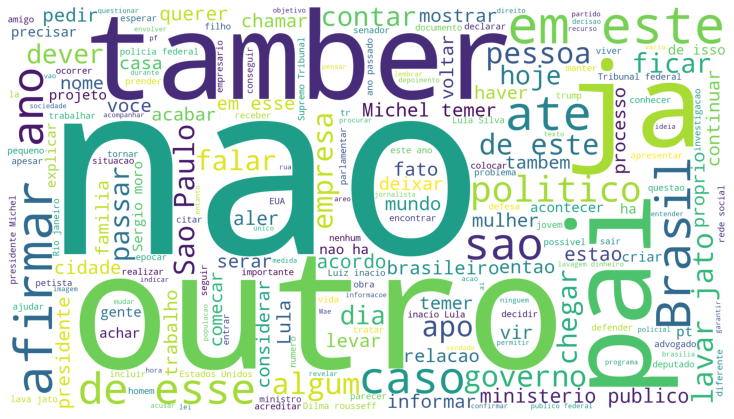

In [15]:
wordclound = WordCloud(width=1920, height=1080, background_color = "white").generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordclound)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
data_frame['conteudo_processado'] = data_frame['conteudo_processado'].apply(lambda x: str(x).lower())

In [17]:
data_frame['label'].replace({'true': 1, 'fake': 0}, inplace=True)

In [18]:
data_frame[['conteudo_processado', 'label']]

,conteudo_processado,label
0,katia abrer colocar expulsao moldura nao recla...,0
1,ray peitar bolsonaro conservador fake entrevis...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatoriar assustador bndes mostrar dinheiro p...,0
4,radialista americano falar pt vender ilusao br...,0
...,...,...
7195,jornal britanico acao lula lavar jato serar ju...,1
7196,temer acionar pf cade investigar aumento preco...,1
7197,obstaculo politico temer especialista ouvir av...,1
7198,setembro noite estao principal noticia voce te...,1


In [19]:
import gensim

In [20]:
y = data_frame['label'].values


In [21]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
[d.split() for d in data_frame['conteudo_processado'].tolist()]

In [23]:
X = [d.split() for d in data_frame['conteudo_processado'].tolist()]

In [24]:
type(X)
print(X[0])

['katia', 'abrer', 'colocar', 'expulsao', 'moldura', 'nao', 'reclamar', 'senador', 'katia', 'abrer', 'expulsao', 'pmdbr', 'resultar', 'acao', 'cupular', 'atual', 'legenda', 'oportunista', 'amanho', 'botar', 'moldura', 'dourar', 'expulsaor', 'mao', 'vir', 'atestar', 'conduta', 'curriculo', 'pessoa', 'expulsar', 'nao', 'servir', 'pai', 'servir', 'pai', 'beneficio', 'proprio', 'katia', 'abrer', 'ue', 'expulsao', 'tao', 'curriculo', 'tantar', 'choradeira', 'katia', 'motivo', 'provavelmente', 'katiar', 'nao', 'pt', 'partido', 'ja', 'dever', 'absorvir', 'parecer', 'pt', 'gostar', 'katia', 'ficar', 'entrincheirar', 'pmdbr', 'rebaixar', 'restar', 'katia', 'ficar', 'chorar', 'pitanga', 'canto', 'ate', 'pt', 'nao', 'cadastrar', 'katia', 'abrer', 'fileira', 'situacao', 'patetico', 'agricultura', 'dilma']


In [25]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [26]:
len(w2v_model.wv.vocab)

67188

In [27]:

w2v_model.wv['lula']

array([-1.5898874 ,  0.5060324 ,  2.1760116 ,  3.0978146 ,  1.9173573 ,
       -1.5417649 ,  2.2069802 ,  0.50226253, -0.9908423 , -2.1816807 ,
       -0.12055603, -4.2596526 ,  1.5108382 , -2.9790492 , -2.6703162 ,
       -1.3019902 ,  3.8246052 ,  1.0662783 , -2.5087876 , -1.0197548 ,
        2.258005  ,  1.3667086 ,  1.4918799 , -1.2001734 ,  2.322304  ,
       -1.4147083 , -3.1766505 , -0.7074726 , -2.2375174 , -1.686725  ,
        2.4670374 , -1.4237386 ,  1.543809  ,  5.5490303 ,  0.7001673 ,
       -1.3935543 , -0.69264174, -3.7416234 , -1.4696047 ,  1.5728571 ,
       -6.1949677 ,  0.73008215, -1.7419573 ,  1.2548844 ,  2.0251195 ,
        3.672581  , -1.2835788 , -1.3756225 , -1.2352488 ,  2.725339  ,
        0.32459432, -3.3465574 , -4.0535135 ,  1.270574  , -1.6958549 ,
       -1.7294612 , -0.853019  , -1.45161   ,  0.66187173,  1.9888047 ,
        2.0257936 , -2.3086073 , -0.9900063 ,  1.4284705 , -2.2000816 ,
        2.3923821 , -1.6426965 ,  0.02279683, -0.43207926,  2.23

In [28]:
w2v_model.wv.most_similar('brasil')

[('brasileiro', 0.7567877769470215),
 ('pai', 0.6322150230407715),
 ('pinioe', 0.5454015731811523),
 ('mundo', 0.5411285161972046),
 ('amadorismo', 0.5171858072280884),
 ('comparar', 0.5018423795700073),
 ('latino', 0.5017455220222473),
 ('crise', 0.4991452693939209),
 ('diageo', 0.49664056301116943),
 ('globalmente', 0.49419787526130676)]

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [30]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

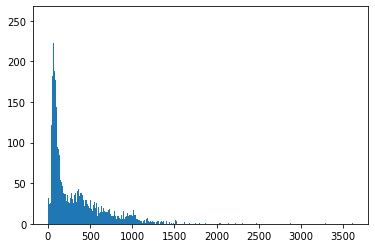

In [33]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [34]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

340

In [35]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [36]:
len(X[0])

1000

In [37]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [38]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [39]:
embedding_vectors = get_weight_matrix(w2v_model)

In [40]:
embedding_vectors.shape

(67189, 100)

In [41]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim= DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         6718900   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 6,836,277
Trainable params: 117,377
Non-trainable params: 6,718,900
_________________________________________________________________


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [47]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
119/119 [==============================] - 126s 1s/step - loss: 0.0968 - acc: 0.9648 - val_loss: 0.1281 - val_acc: 0.9587
Epoch 2/6
119/119 [==============================] - 126s 1s/step - loss: 0.0895 - acc: 0.9659 - val_loss: 0.1263 - val_acc: 0.9574
Epoch 3/6
119/119 [==============================] - 126s 1s/step - loss: 0.0905 - acc: 0.9680 - val_loss: 0.1453 - val_acc: 0.9451
Epoch 4/6
119/119 [==============================] - 124s 1s/step - loss: 0.0813 - acc: 0.9717 - val_loss: 0.1342 - val_acc: 0.9562
Epoch 5/6
119/119 [==============================] - 125s 1s/step - loss: 0.0644 - acc: 0.9788 - val_loss: 0.1422 - val_acc: 0.9482
Epoch 6/6
119/119 [==============================] - 125s 1s/step - loss: 0.0861 - acc: 0.9690 - val_loss: 0.1411 - val_acc: 0.9531


In [48]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [49]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       917
           1       0.97      0.94      0.95       883

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800



In [52]:
x = ['Uma notícia tratada e assim']
print(x)

['Uma notícia tratada e assim']


In [53]:
X_test

array([[    0,     0,     0, ...,  7515, 11629,   148],
       [    0,     0,     0, ...,    67,    22,   108],
       [    0,     0,     0, ...,    56,  2210,  4501],
       ...,
       [    0,     0,     0, ...,  3121,    94,   856],
       [    0,     0,     0, ...,  1063,    40,  5915],
       [    0,     0,     0, ...,  2781,   824,    42]], dtype=int32)

In [54]:
tokenizer.texts_to_sequences(x)

[[45560, 1473]]

In [60]:
x = ['Uma notícia tratada e assim']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
(model.predict(x) >= 0.5).astype(int)


array([[0]])

In [91]:
x = ["Lula consolida liderança em nova pesquisa chegando aos incríveis 171% de intenção de votos"]

In [92]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[0]])

In [96]:
x = ['Você sabia que em dois mandatos como presidente, Lula e o Partido dos Trabalhadores não aumentou o botijão de gás nenhuma vez']

In [99]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[0]])

In [100]:
x = ['depoimento palocci conta financiaria projeto pt poder depoimento juiz federal sergio moro ocorreu antonio palocci governos lula dilma disse depoimento juiz federal sergio moro responsavel operacao lava jato primeira instancia financiaria projeto pt poder segundo palocci luiz inacio lula silva disse passaporte brasil futuro vai pagar contas nacionais vai ser grande financiador contas nacionais grandes projetos brasil depos inquerito apura pagamento r milhoes propina odebrecht lula forma apartamento compra terreno onde construida nova sede instituto lula defesa lula diz palocci fez acusacoes falsas provas enquanto negocia delacao ministerio publico saiba juiz sergio moro voltou questionar palocci sobre conhecimento lula respeito corrupcao petrobras entao detalhou plano usar recursos financiamento campanha dilma rousseff presidencia voltando onde encerramos ultima parte senhor mencionou senhor luiz inacio lula silva conhecimento corrupcao petrobras ai senhor mencionou orientado aumentar reserva partidaria senhor pode esclarecer melhor perguntou moro posso ah meados talvez nesse periodo tratando chamou reuniao biblioteca palacio alvorada deputado nessa reuniao jose sergio gabrielli petrobras ministra casa civil presidente dilma nesse momento ja candidata talvez nao aprovada ainda convencao ja definida candidata pacifico relatou presidente falou primeira vez falou dessa maneira tao direta falou olha chamei voces aqui porque passaporte brasil futuro vai dar ener combustivel pra projeto politico longo prazo brasil vai pagar contas nacionais vai ser grande financiador contas nacionais grandes projetos brasil quero gabrielli faca sondas pensando neste grande projeto brasil palocci aqui gabrielli porque vai acompanhar nesse projeto pra total sucesso pra garanta parcela desses projetos financie campanha dessa companheira aqui dilma rousseff quero ver eleita presidente brasil acrescentou entao encomendou pro gabrielli atraves sondas pagasse campanha presidente dilma obviamente pedindo empresas valores destinados campanha finalizou palocci moro palocci disse ate entao nunca visto gabrielli participar qualquer ato ilicito razao procurado petrobras oferecer ajuda nao aceita perguntei queria vou ser bem franco aqui queria operasse algum diretor petrobras renato duque outros pra fazer desenvolver encomenda presidente ficaria disso disse nao trataria presidente mandou tratar trataria afirmou conforme gabrielli nao conseguiu atender pedido segundo palocci margem lucro empresas nacionais nesse caso reduzida inviabilizou possibilidade solicitar repasses eleicao disse apenas companhias estrangeiras fizeram pagamentos nao havia nenhuma margem pra contribuicao claro pra mim pra colocou pra mim tava claro nada ia acontecer ali ilicito ilicitos forma termos vamos dizer fazer pagamento ilicito ja processo empresas estrangeiras pagaram vacari porque porque empresas estrangeiras vinham curva aprendizagem conseguiam fazer brasil nao mesma curva construida pais origem ganho tecnologico experiencia maior disse nota gabrielli disse construcao sondas brasil projeto estrategico pais poderia reerguer industria naval pais confirmou condicoes economicas projeto restritas nao haveria margem pagamentos qualquer especie parte empresas nao recordo referencia financiamento campanha reunioes presidente lula proprio palocci disse palocci tambem questionado sobre outros assuntos respondeu todas perguntas disse palocci preso desde setembro ano passado ja condenacao anos prisao operacao lava jato depoimento levado volta carceragem policia federal curitiba onde segue preso palocci contou moro final mandato lula chegando fim emilio odebrecht procurou fazer pacto envolvia pacote propinas segundo palocci empresa entrou certo panico posse presidente dilma nesse momento emilio odebrecht fez especie pacto sangue presidente lula procurou presidente lula ultimos dias mandato levou pacote propinas disse envolvia terreno instituto ja comprado emilio apresentou presidente lula sitio uso familia presidente lula fazendo reforma fase final disse presidente lula ja pronto tambem disse presidente lula tambem disposicao proximo periodo fazer atividades politicas r milhoes detalhou palocci palocci afirmou dia seguinte manha lula chamou palacio alvorada contou sobre reuniao emilio odebrecht disse relacoes empresa governos lula dilma bastante intensas queria dizer denuncia procede fatos narrados nela sao verdadeiros diria apenas fatos narrados nessa denuncia dizem respeito apenas capitulo livro pouco maior relacionamento empresa questao odebrecht governo lula governo dilma relacao bastante intensa bastante vantagens empresa propinas pagas odebrecht agentes publicos forma doacao campanha forma beneficios pessoais caixa caixa dois afirmou palocci disse moro pediu marcelo odebrecht dinheiro cobrir buraco contas instituto lula volto tratar alguns recursos pedido lula episodio marcelo relatou verdadeiro pedido fiz r milhoes pro instituto lula verdade acho meio final comeco paulo okamotto presidente instituto buraco contas pediu arrumar recursos marcelo odebrecht ia viajar exterior disse precisava muita urgencia ideia procurasse varias empresas disse nao posso vou procurar so marcelo pedi r milhoes detalhou moro marcelo concordou dar falou disponibilidade pedi brani branislav kontic palocci transmitir paulo okamotto dados r milhoes havia pedido palocci afirmou ainda conversa sobre terreno odebrecht iria comprar ser nova sede instituto lula voltei falar lula sobre predio instituto falei conversa bumlai falei nao gostaria fizesse desse jeito senhor fazendo instituto receber doacoes fazer atividade nao sei porque procurar agora terreno nao problema nenhum receber doacao odebrecht formal menos revestida formalidade afirmou ate comentei nesse dia ilicito odebrecht ja monstruoso fizermos tipo operacao vamos criar fratura exposta desnecessaria disse palocci moro respeito declaracoes prestadas antonio palocci depoimento justica federal setembro assessoria imprensa presidenta eleita dilma rousseff esclarece senhor antonio palocci falta verdade aponta envolvimento dilma rousseff supostas reunioes governo tratar facilidades empresa odebrecht durante mandato presidente luiz inacio lula silva primeiro governo tais encontros tratativas relatadas jamais ocorreram relatos repasses propinas tambem sao mentira todo conteudo supostas conversas descritas senhor antonio palocci participacao entao ministra dilma rousseff assumiu presidencia ficcao estrategia adotada delator busca beneficios delacao premiada episodio cita inacreditavel beneficio odebrecht governo dilma rousseff durante processo concessoes aeroportos mostra senhor antonio palocci mente declarou perante justica federal decisao governo dilma nao permitir consorcio empresa ganhasse aeroporto criada presidenta eleita beneficiar diretamente odebrecht mentira tal decisao tomada governo gerar concorrencia empresas concessionarias aeroportos evitar caso empresa concessao dois aeroportos priorizasse detrimento outro governo dilma buscava atrair empresas participar sistema aeroportuario garantindo agencia nacional aviacao civil anac orgao regulador parametros atuar concorrencia menos concentracao eis fato desmascara mentiras senhor antonio palocci empresa odebrecht ganhou disputa junto grupo changi pagou r bilhoes outorga galeao duvida maior outorga paga aeroportos brasil afasta acusacao beneficiamento indevido declarada palocci quadro abaixo demonstra responsavel maior outorga paga direito explorar apenas seis aeroportos cujas concessoes feitas governo dilma concessoes aeroportos governo dilma sao goncalo amarante natal rn guarulhos viracopos brasilia galeao confins eis fatos ficcao criada senhor antonio palocci nao sustenta odebrecht pagou direito explorar aeroporto nenhuma empresa desembolsou tanto beneficio obteria governo dilma rousseff pagando logica sustenta relato absurdo palocci disse moro algumas oportunidades reuniu lula sentido criar obstaculos lava jato posso citar casos senhor desejar diz vamos deixar outra oportunidade questao responde moro dizendo vai ater objeto acao palocci prestando depoimento lula denunciado neste caso dezembro juiz sergio moro aceitou denuncia quatro dias segundo mpf construtora norberto odebrecht pagou r terreno onde construida nova sede instituto lula obra nao executada denuncia afirma tambem lula recebeu vantagem indevida cobertura vizinha residencia onde vive acordo mpf usados r mil compra imovel ainda conforme segundo apartamento adquirido nome glaucos costamarques atuado testa ferro lula procuradores afirmam tentativa dissimular real propriedade apartamento marisa leticia chegou assinar contrato ficticio locacao glaucos costamarques lula condenado processo sobre triplex guaruja sao paulo anos seis meses corrupcao passiva lavagem dinheiro alem disso tambem denunciado lava jato processo envolve sitio atibaia interior paulista']

In [101]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[1]])